In [9]:
# https://pierrelucbacon.com/mlbook/ch2-linear-regression/#visualisation-ellipse-des-donn-es-et-vecteurs-singuliers

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

In [4]:
np.random.seed(42)

n_points = 200
mean = [0, 0]
cov = [[2.0, 1.2], [1.2, 1.0]]
X = np.random.multivariate_normal(mean, cov, n_points)

In [5]:
X_centered = X - np.mean(X, axis=0)

U, d, Vt = np.linalg.svd(X_centered, full_matrices=False)
V = Vt.T

In [6]:
std_1 = d[0] / np.sqrt(n_points - 1)
std_2 = d[1] / np.sqrt(n_points - 1)

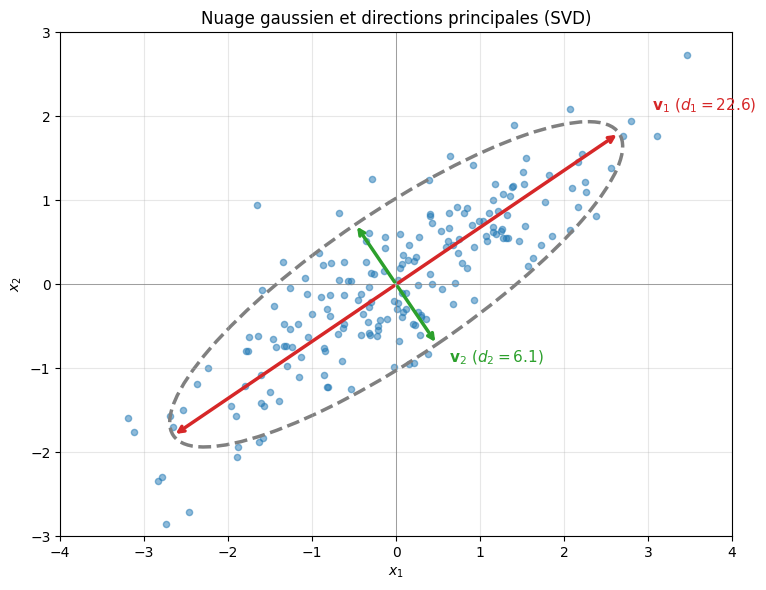

In [19]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.scatter(X_centered[:, 0], X_centered[:, 1], alpha=0.5, s=20, c='tab:blue', label='data')

origin = (0, 0)
scale = 2.0

ax.annotate('', xy=V[:, 0] * std_1 * scale, xytext=origin, arrowprops=dict(arrowstyle='->', color='tab:red', lw=2.5), label='1st singular vector')
ax.annotate('', xy=-V[:, 0] * std_1 * scale, xytext=origin, arrowprops=dict(arrowstyle='->', color='tab:red', lw=2.5), label='1st singular vector')

ax.annotate('', xy=V[:, 1] * std_2 * scale, xytext=origin, arrowprops=dict(arrowstyle='->', color='tab:green', lw=2.5), label='2nd singular vector')
ax.annotate('', xy=-V[:, 1] * std_2 * scale, xytext=origin, arrowprops=dict(arrowstyle='->', color='tab:green', lw=2.5), label='2nd singular vector')

angle = np.degrees(np.arctan2(V[1, 0], V[0, 0]))
ellipse = Ellipse(xy=origin, width=4 * std_1, height=4 * std_2, angle=angle, fill=False, edgecolor='gray', linestyle='--', facecolor='none', lw=2.5, label='data ellipse')
ax.add_patch(ellipse)

ax.text(V[0, 0] * std_1 * scale * 1.15, V[1, 0] * std_1 * scale * 1.15, f'$\\mathbf{{v}}_1$ ($d_1 = {d[0]:.1f}$)', fontsize=11, color='tab:red')
ax.text(V[0, 1] * std_2 * scale * 1.3, V[1, 1] * std_2 * scale * 1.3, f'$\\mathbf{{v}}_2$ ($d_2 = {d[1]:.1f}$)', fontsize=11, color='tab:green')

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_title('Nuage gaussien et directions principales (SVD)')
ax.set_aspect('equal')
ax.grid(True, alpha=0.3)
ax.axhline(0, color='gray', linewidth=0.5)
ax.axvline(0, color='gray', linewidth=0.5)
ax.set_xlim(-4, 4)
ax.set_ylim(-3, 3)

plt.tight_layout()